# Is physical population density correlated with online social network density and activity?
## Are there differences in Twitter user behaviors and networks depending on city size?

The following program compares 1,000 users from <strong>the largest city in Indiana to the smallest city in Indiana</strong> according to four metrics using the `user` object:<br>
1) the number of <b>tweets</b><br>
2) the number of <b>tweets they've favorited</b><br>
2) the number of <b>people they follow</b><br>
3) the number of <b>followers</b><br>

_Note: As of 2024, the geo data feature is no longer available at the free level for developers on X._

In [ ]:
import tweepy
import json
from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Indianapolis (pop. 887,642)

Get the usernames of the last 1000 tweets from its geocode: 39.77,-86.16, within a 20km radius.

In [2]:
#Get the last 1000 tweets from Indianapolis, the largest city in Indiana (according to Wikipedia)
lgst_results = []
unique = []
for tweet in tweepy.Cursor(api.search, 
                           'geocode:39.77,-86.16,20km',
                           tweet_mode = 'extended',
                           count=200).items(1000):
#Eliminate repeat usernames
    if len(unique)<100:
        if tweet.user.screen_name not in unique:
            unique.append(tweet.user.screen_name)
            lgst_results.append(tweet.user._json) 
print (unique) #just as a check

['MichelleFreed', 'NRDugger', 'NoGoodCitizen', 'ShopgirlAlic', 'playboifartin', 'monika7', 'Jamesstefano12', 'CaraLTaylor', 'Indysbest2', 'wesleymillerlaw', 'litescript', 'CoachGondak', 'OfficalDrock', 'ProTaxevader', 'turleybrandenb', 'jbhbeloved', 'Jaron1895', 'Interceptor_On', 'OldTimeRadioUSA', 'MrATLien', 'WmLaDow', '___KenziePaige', 'AaronKivisto', 'fourlowfun', 'lexi_Harrison', '_asiah__', 'aye_jaban', 'JohnReddick95', 'jimrodg44783411', 'raestifebri', 'l_dubs304', 'SharonShotts', 'MaryMarsh66', 'jenny_wohlfarth', 'VivaLaSTACiA', 'itsSDeeZ', 'tyisonline', '_skysoul', 'bruneaux_mahs', 'Lapus24', 'CRYPTlDDYKE', 'DavidSpencerEdu', 'trashandexcuses', 'ericfndz', '_hannahrodgers', '_alexcarson', 'arigotjuice', 'warb11ngton', 'no_endorsement', 'ahow628', 'dontpeepme', 'kd9_3', 'localindyman', 'KrispyKrese', 'imnicolecv', 'daphnebeckk', '_CreamFillin_', 'cornnymph', 'iGlockiana_', 'AureliaApple', 'mroahrig', 'katyparries', 'WillyT_Ribbs', 'DjBoogieBang', 'MeechieThaGoat', 'DustinDopira

In [49]:
#Converts to a CSV file
with open('raw_lgst.json', 'w') as f:
    json.dump(lgst_results, f)
with open('raw_lgst.json', 'r') as f:
    tweets = json.load(f)

#imports CSV
import csv
with open('cleaned_lgst.csv', 'w', encoding='UTF-8', newline='') as fn:
    f = csv.writer(fn)
    f.writerow(['screen_name',
                'followers_count',
                'friends_count',
                'favourites_count',
                'statuses_count'
               ])
    for tweet in tweets:
        f.writerow([tweet['screen_name'], 
                    tweet['followers_count'],
                    tweet['friends_count'],
                    tweet['favourites_count'],
                    tweet['statuses_count']
                   ])

#imports all the cool visualization / math packages
import pandas as pd
import seaborn as sns
import numpy as np

#opens the CSV, makes it a dataframe
lgst = pd.read_csv('./cleaned_lgst.csv')

## Cannelton (pop. 1,524)

Get the usernames of the last 1000 tweets from its geocode: 39.91,-86.74, within a 20km radius.

In [18]:
#Get the last 50 tweets from Cannelton, the smallest city in Indiana (according to Wikipedia)
smlst_results = []
unique = []
for tweet in tweepy.Cursor(api.search, 
                           'geocode:39.91,-86.74,20km',
                           tweet_mode = 'extended',
                           count=200).items(1000):
#Eliminate repeat usernames
    if len(unique)<100:
        if tweet.user.screen_name not in unique:
            unique.append(tweet.user.screen_name)
            smlst_results.append(tweet.user._json) 
print (unique) #just as a check

['gizm010', 'Wudz_', 'nicolecbo', 'JeffPBLK', 'Ajeng_illa29', 'bigSUBWAYY', 'KevinDaGunny', 'kaitlingibson0', 'Rodrigo64776178', 'DANFlNlTY', 'jscottbrody', 'USN_Goblin', 'PhilWeaks', 'DustinDopirak', 'HMetaphors', 'LeighWells15', 'tylerschenck', 'realnickelass', 'mostlymidwestrn', 'MichelleFreed', 'NRDugger', 'NoGoodCitizen', 'ShopgirlAlic', 'playboifartin', 'monika7', 'Jamesstefano12', 'CaraLTaylor', 'Indysbest2', 'wesleymillerlaw', 'litescript', 'CoachGondak', 'OfficalDrock', 'ProTaxevader', 'turleybrandenb', 'jbhbeloved', 'Jaron1895', 'Interceptor_On', 'OldTimeRadioUSA', 'MrATLien', 'WmLaDow', '___KenziePaige', 'AaronKivisto', 'fourlowfun', 'lexi_Harrison', '_asiah__', 'aye_jaban', 'JohnReddick95', 'jimrodg44783411', 'raestifebri', 'l_dubs304', 'SharonShotts', 'MaryMarsh66', 'jenny_wohlfarth', 'VivaLaSTACiA', 'itsSDeeZ', 'tyisonline', '_skysoul', 'bruneaux_mahs', 'Lapus24', 'CRYPTlDDYKE', 'DavidSpencerEdu', 'trashandexcuses', 'ericfndz', '_hannahrodgers', '_alexcarson', 'arigotjuic

In [58]:
#Converts to a CSV file
with open('raw_smlst.json', 'w') as f:
    json.dump(smlst_results, f)
with open('raw_smlst.json', 'r') as f:
    tweets = json.load(f)

#Imports CSV
import csv
with open('cleaned_smlst.csv', 'w', encoding='UTF-8', newline='') as fn:
    f = csv.writer(fn)
    f.writerow(['screen_name',
                'followers_count',
                'friends_count',
                'favourites_count',
                'statuses_count'
               ])
    for tweet in tweets:
        f.writerow([tweet['screen_name'], 
                    tweet['followers_count'],
                    tweet['friends_count'],
                    tweet['favourites_count'],
                    tweet['statuses_count']
                   ])

#Opens the CSV, makes it a dataframe
smlst = pd.read_csv('./cleaned_smlst.csv')

In [63]:
#Adds a column to each dataframe labeling it as coming from the largest or the smallest city
lgst['size'] = "largest"
smlst['size'] = "smallest"

#Concatenates both dataframes for comparisons
combined = pd.concat([smlst, lgst])
combined

,screen_name,followers_count,friends_count,favourites_count,statuses_count,size
0,gizm010,127,200,1419,1123,smallest
1,Wudz_,1182,594,118539,75341,smallest
2,nicolecbo,1100,819,182,8292,smallest
3,JeffPBLK,576,772,4915,8169,smallest
4,Ajeng_illa29,1343,4158,8410,32615,smallest
...,...,...,...,...,...,...
95,LimelightChris,204,362,2,304,largest
96,special_c15,365,1148,14909,2076,largest
97,LaughinDoggo,105,703,29553,11756,largest
98,gafemoyano,23,606,1075,310,largest


In [68]:
# Calculates total of followers, friends, favorites, and statuses for Indianapolis (largest city).
lgst.loc[:,"followers_count":"statuses_count"].mean() 

followers_count      1299.19
friends_count        1187.57
favourites_count    18463.62
statuses_count      24619.97
dtype: float64

In [70]:
# Calculates total of followers, friends, favorites, and statuses for Indianapolis (smallest city).
smlst.loc[:,"followers_count":"statuses_count"].mean()

followers_count      1205.03
friends_count        1130.11
favourites_count    18612.88
statuses_count      23382.93
dtype: float64

## Comparison of Indiana and Cannelton.

Compares the number of Tweets between the two cities. There is no significant difference.

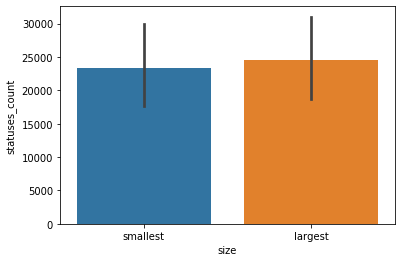

In [72]:
#Number of Tweets
sns.barplot(y='statuses_count', x= 'size', data = combined);

Compares the number of favorited Tweets between the two cities.

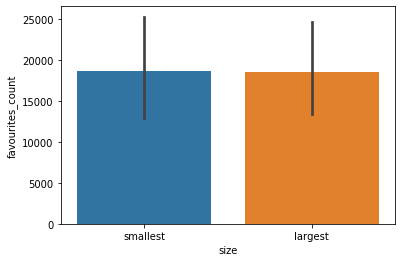

In [76]:
#Number of favorited tweets
sns.barplot(y='favourites_count', x= 'size', data = combined);

Compares the number of friends between the two cities.

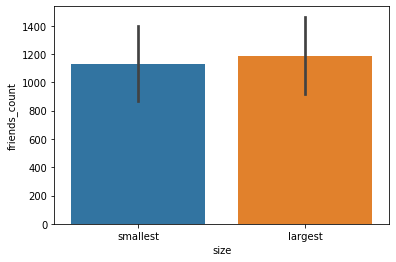

In [77]:
#Number of friends
sns.barplot(y='friends_count', x= 'size', data = combined);

Compares the number of followers between the two cities.

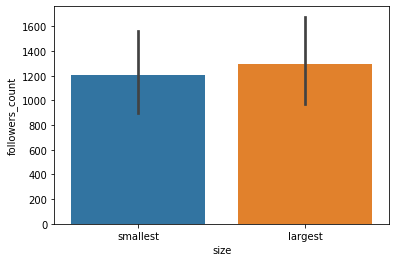

In [79]:
#Number of followers
sns.barplot(y='followers_count', x= 'size', data = combined);

### Correlations between metrics.
#### The scatterplots show the relationship between the variables 1) number of friends, 2) number of followers, 3) number of tweets, 4) number of favorites.
They are arranged from (what appears to be) the weakest to the strongest correlation.

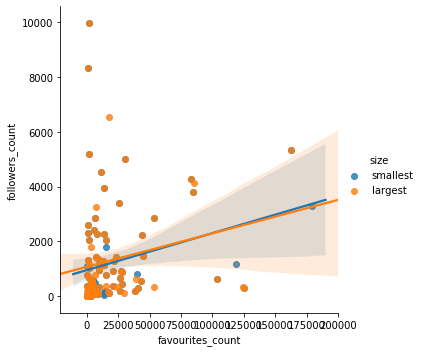

In [74]:
#FAVORITING & NUMBER OF FOLLOWERS - users may feel they should favorite their followers' tweets
sns.lmplot(x="favourites_count", y="followers_count", hue="size", data=combined)

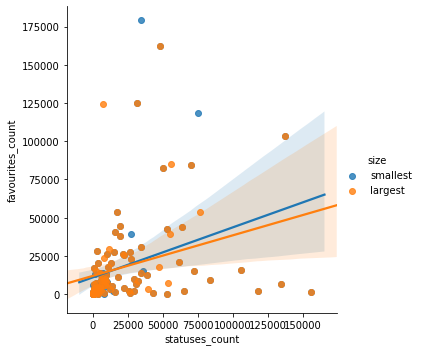

In [83]:
#TWEETING & FAVORITING - users who are more active posting also like others' tweets more
sns.lmplot(x="statuses_count", y="favourites_count", hue="size", data=combined)

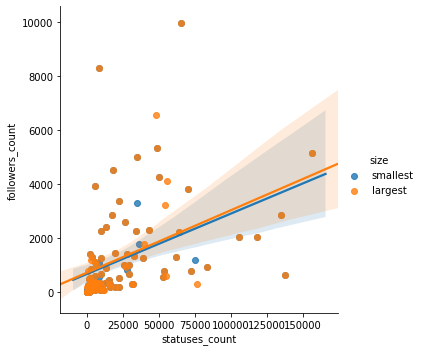

In [81]:
#TWEETING & NUMBER OF FOLLOWERS - users who are more active have more followers
sns.lmplot(x="statuses_count", y="followers_count", hue="size", data=combined)

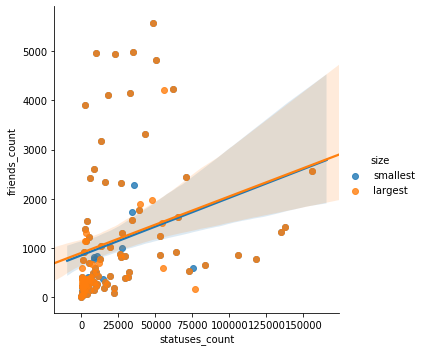

In [80]:
#TWEETING & NUMBER OF FRIENDS - users who are more active have more friends
sns.lmplot(x="statuses_count", y="friends_count", hue="size", data=combined)

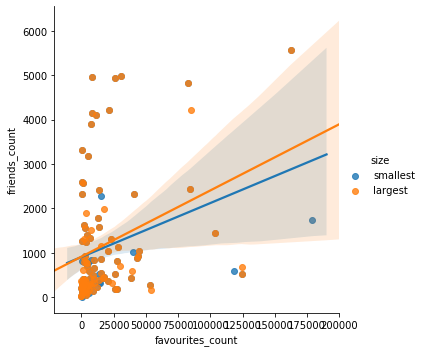

In [73]:
#FAVORITING & NUMBER OF FRIENDS - users may feel they should favorite their friends' tweets; more friends = more favorites?
sns.lmplot(x="favourites_count", y="friends_count", hue="size", data=combined)

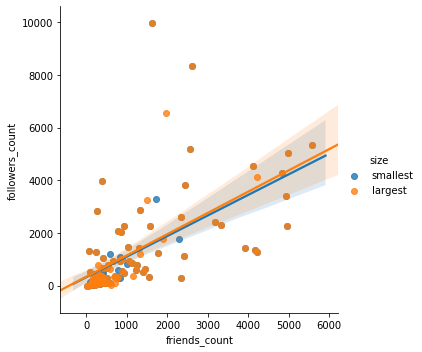

In [82]:
#NUMBER OF FRIENDS & NUMBER OF FOLLOWERS - users with more friends also have more followers
sns.lmplot(x="friends_count", y="followers_count", hue="size", data=combined)

### Are there differences in Twitter user behaviors/networks between the largest and the smallest city in Indiana?

Not significantly. Comparing number of 1) tweets, 2) favorited tweets, 3) people followed, 4) followers, there really doesn't seem to be.<br>
(However, there could be bots whose behavior is making the two groups appear more similar.)

There is a high degree of variability in the hypothesized relationships above, and no real conclusions can be drawn from the visualizations. The relationship with the strongest correlation and the least variability is <b>the number of friends is correlated with the number of followers.<b>

#### <br>

(Just a bunch of log stuff I did to check if there was a relationship.)

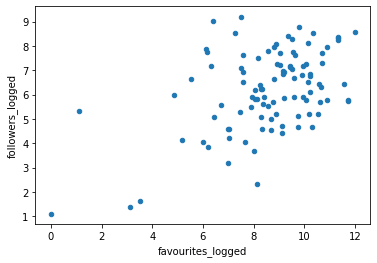

In [8]:
lgst['favourites_logged'] = np.log(lgst.favourites_count+1)
lgst['followers_logged'] = np.log(lgst.followers_count+1)
lgst.plot.scatter(x = 'favourites_logged', y = 'followers_logged')

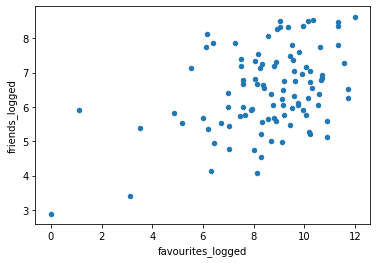

In [6]:
lgst['favourites_logged'] = np.log(lgst.favourites_count+1)
lgst['friends_logged'] = np.log(lgst.friends_count+1)
lgst.plot.scatter(x = 'favourites_logged', y = 'friends_logged')

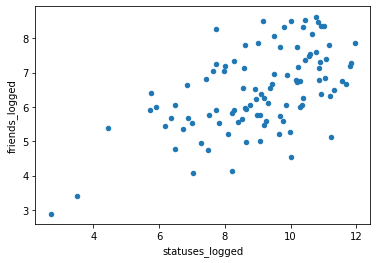

In [10]:
lgst['statuses_logged'] = np.log(lgst.statuses_count+1)
lgst['friends_logged'] = np.log(lgst.friends_count+1)
lgst.plot.scatter(x = 'statuses_logged', y = 'friends_logged')

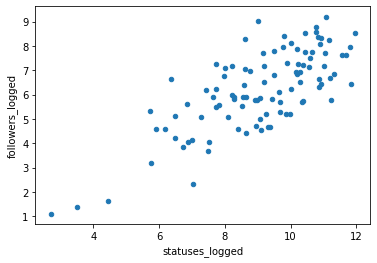

In [12]:
lgst['statuses_logged'] = np.log(lgst.statuses_count+1)
lgst['followers_logged'] = np.log(lgst.followers_count+1)
lgst.plot.scatter(x = 'statuses_logged', y = 'followers_logged')

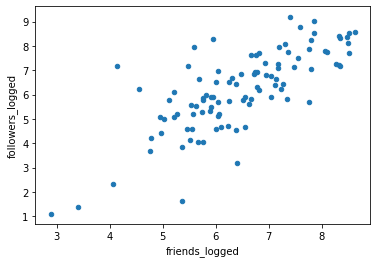

In [14]:
lgst['friends_logged'] = np.log(lgst.friends_count+1)
lgst['followers_logged'] = np.log(lgst.followers_count+1)
lgst.plot.scatter(x = 'friends_logged', y = 'followers_logged')

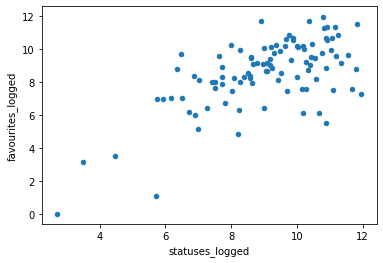

In [16]:
lgst['statuses_logged'] = np.log(lgst.statuses_count+1)
lgst['favourites_logged'] = np.log(lgst.favourites_count+1)
lgst.plot.scatter(x = 'statuses_logged', y = 'favourites_logged')

In [21]:
smlst.loc[:,"followers_count2":"statuses_count2"].mean()

followers_count2      1205.03
friends_count2        1130.11
favourites_count2    18612.88
statuses_count2      23382.93
dtype: float64

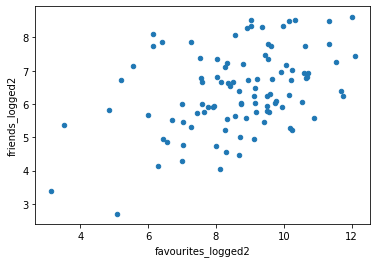

In [26]:
smlst['favourites_logged2'] = np.log(smlst.favourites_count2+1)
smlst['friends_logged2'] = np.log(smlst.friends_count2+1)
smlst.plot.scatter(x = 'favourites_logged2', y = 'friends_logged2')

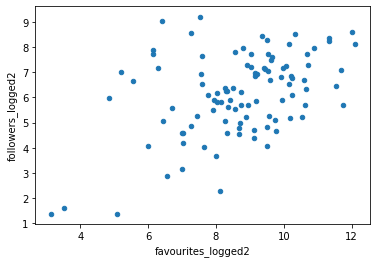

In [28]:
smlst['favourites_logged2'] = np.log(smlst.favourites_count2+1)
smlst['followers_logged2'] = np.log(smlst.followers_count2+1)
smlst.plot.scatter(x = 'favourites_logged2', y = 'followers_logged2')

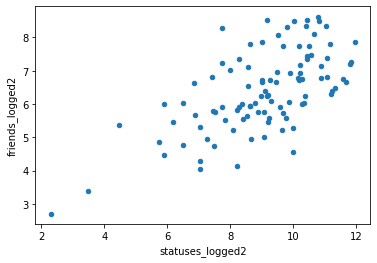

In [41]:
smlst['statuses_logged2'] = np.log(smlst.statuses_count2+1)
smlst['friends_logged2'] = np.log(smlst.friends_count2+1)
smlst.plot.scatter(x = 'statuses_logged2', y = 'friends_logged2')

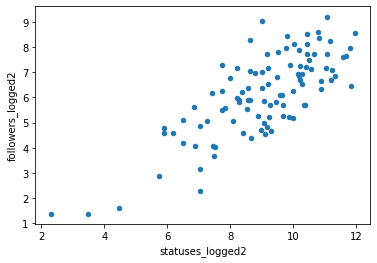

In [34]:
smlst['statuses_logged2'] = np.log(smlst.statuses_count2+1)
smlst['followers_logged2'] = np.log(smlst.followers_count2+1)
smlst.plot.scatter(x = 'statuses_logged2', y = 'followers_logged2')

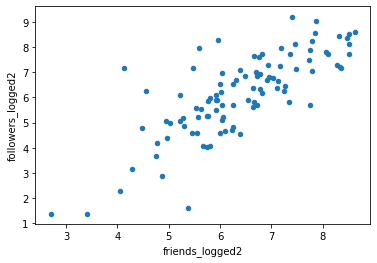

In [44]:
smlst['friends_logged2'] = np.log(smlst.friends_count2+1)
smlst['followers_logged2'] = np.log(smlst.followers_count2+1)
smlst.plot.scatter(x = 'friends_logged2', y = 'followers_logged2')

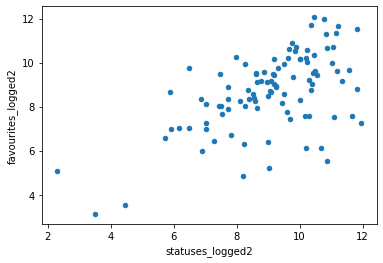

In [36]:
smlst['statuses_logged2'] = np.log(smlst.statuses_count2+1)
smlst['favourites_logged2'] = np.log(smlst.favourites_count2+1)
smlst.plot.scatter(x = 'statuses_logged2', y = 'favourites_logged2')